# Imbalance Data

The problem was formulated as a three-category classification task, in which there is a strong imbalance towards one of the classes as we can see below.

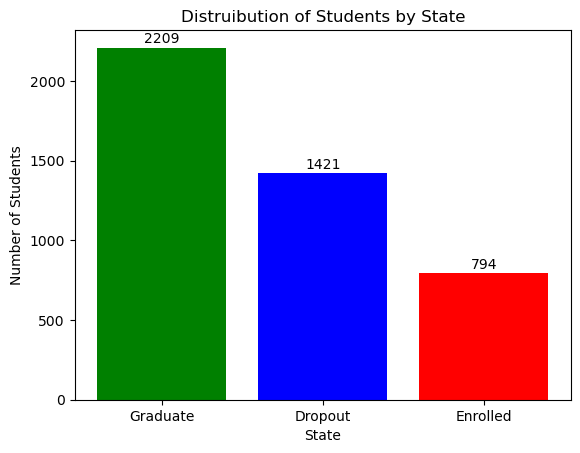

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#load the data
df = pd.read_csv('data.csv', sep=';')

# Extract the relevant columns
x= df.iloc[:,-1]


state_counts = x.value_counts()


plt.bar(state_counts.index, state_counts.values, color=['green', 'blue', 'red'])

for i, value in enumerate(state_counts.values):
    plt.text(i, value + 10, str(value), ha='center', va='bottom')

plt.title('Distruibution of Students by State')
plt.xlabel('State')
plt.ylabel('Number of Students')
plt.show()

We can see the imbalence of data too when grouping students outcome by course, gender, if they are displaced, if the tuition is paid and if they have a scholarship.

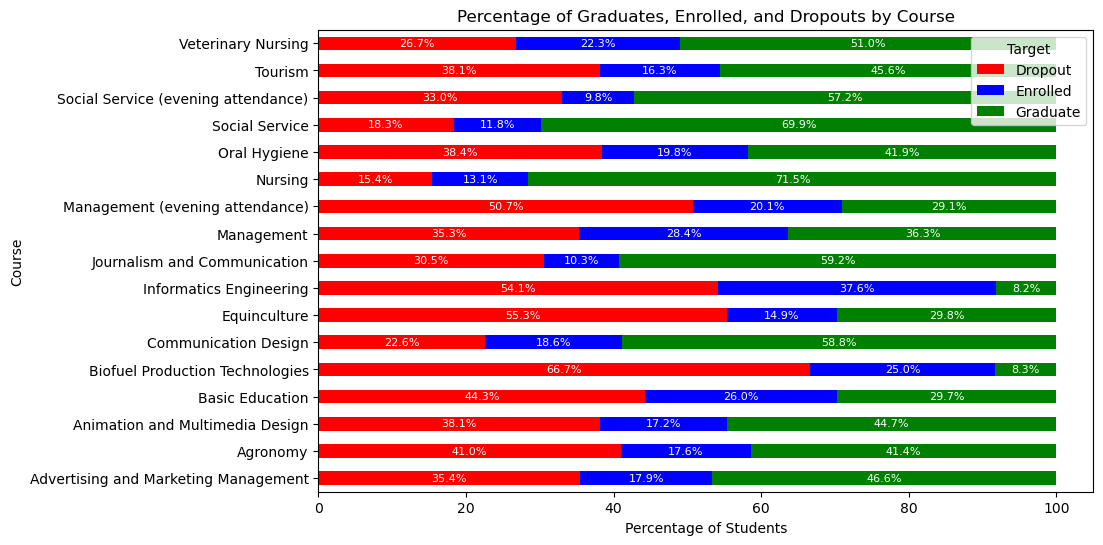

In [3]:
# Mapping of course numbers to course names
course_mapping = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

gender = {
    0: 'Female',
    1: 'Male'
}

boolean_mapping = {
    0: 'No',
    1: 'Yes'
}

df['Course'] = df['Course'].map(course_mapping)
df['Gender'] = df['Gender'].map(gender)
df['Displaced'] = df['Displaced'].map(boolean_mapping)
df['Tuition fees up to date'] = df['Tuition fees up to date'].map(boolean_mapping)
df['Scholarship holder'] = df['Scholarship holder'].map(boolean_mapping)

# Group by course and count the number of graduates, enrolled, and dropouts
grouped_data = df.groupby(['Course', 'Target']).size().unstack(fill_value=0)

# Group by course and calculate percentages
grouped_data_percentage = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100
ax = grouped_data_percentage.plot(kind='barh', stacked=True, figsize=(10, 6),color=['red', 'blue', 'green'])
plt.title('Percentage of Graduates, Enrolled, and Dropouts by Course')
plt.xlabel('Percentage of Students')
plt.ylabel('Course')
plt.legend(title='Target')
for i, bars in enumerate(ax.containers):
    ax.bar_label(bars, fmt='%.1f%%', label_type='center', fontsize=8, color='white')
plt.show()


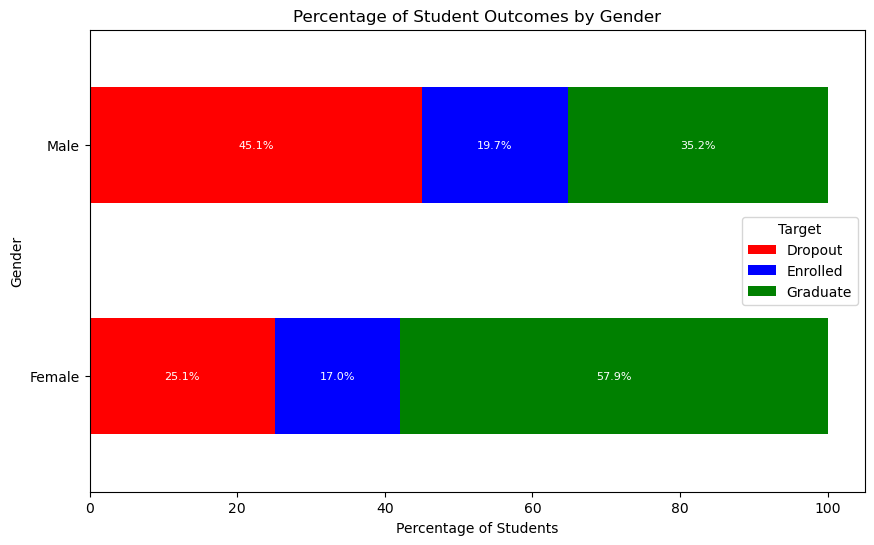

In [5]:
# Group by gender and count the number of graduates, enrolled, and dropouts
grouped_gender = df.groupby(['Gender', 'Target']).size().unstack(fill_value=0)

# Group by gender and calculate percentages
grouped_gender_percentage = grouped_gender.div(grouped_gender.sum(axis=1), axis=0) * 100
ax = grouped_gender_percentage.plot(kind='barh', stacked=True, figsize=(10, 6), color=['red', 'blue', 'green'])
plt.title('Percentage of Student Outcomes by Gender')
plt.xlabel('Percentage of Students')
plt.ylabel('Gender')
plt.legend(title='Target')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='center', fontsize=8, color='white')
plt.show()


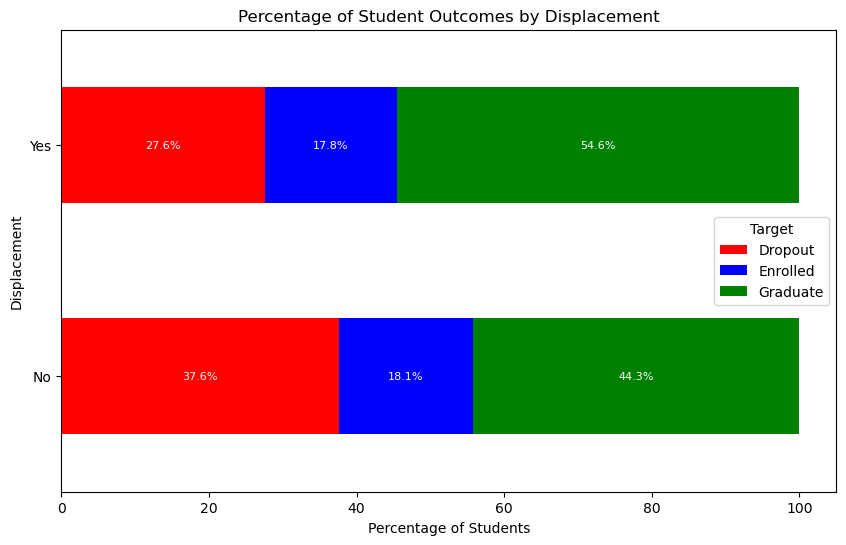

In [4]:
# Group by student displacement and count the number of graduates, enrolled, and dropouts
grouped_displacement = df.groupby(['Displaced', 'Target']).size().unstack(fill_value=0)

# Group by student displacement and calculate percentages
grouped_displacement_percentage = grouped_displacement.div(grouped_displacement.sum(axis=1), axis=0) * 100
ax = grouped_displacement_percentage.plot(kind='barh', stacked=True, figsize=(10, 6), color=['red', 'blue', 'green'])
plt.title('Percentage of Student Outcomes by Displacement')
plt.xlabel('Percentage of Students')
plt.ylabel('Displacement')
plt.legend(title='Target')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='center', fontsize=8, color='white')
plt.show()


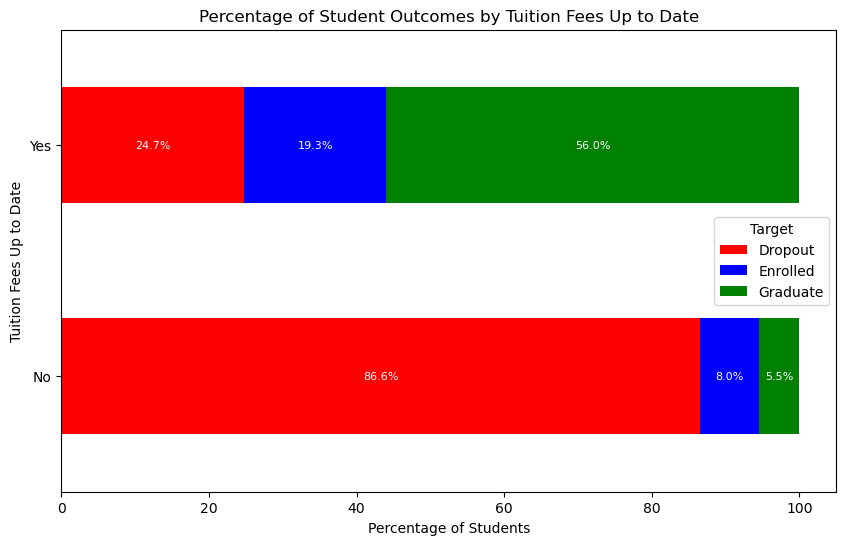

In [6]:
# Group by tuition fees up to date and count the number of graduates, enrolled, and dropouts
grouped_tuition = df.groupby(['Tuition fees up to date', 'Target']).size().unstack(fill_value=0)

# Group by tuition fees up to date and calculate percentages
grouped_tuition_percentage = grouped_tuition.div(grouped_tuition.sum(axis=1), axis=0) * 100
ax = grouped_tuition_percentage.plot(kind='barh', stacked=True, figsize=(10, 6), color=['red', 'blue', 'green'])
plt.title('Percentage of Student Outcomes by Tuition Fees Up to Date')
plt.xlabel('Percentage of Students')
plt.ylabel('Tuition Fees Up to Date')
plt.legend(title='Target')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='center', fontsize=8, color='white')
plt.show()


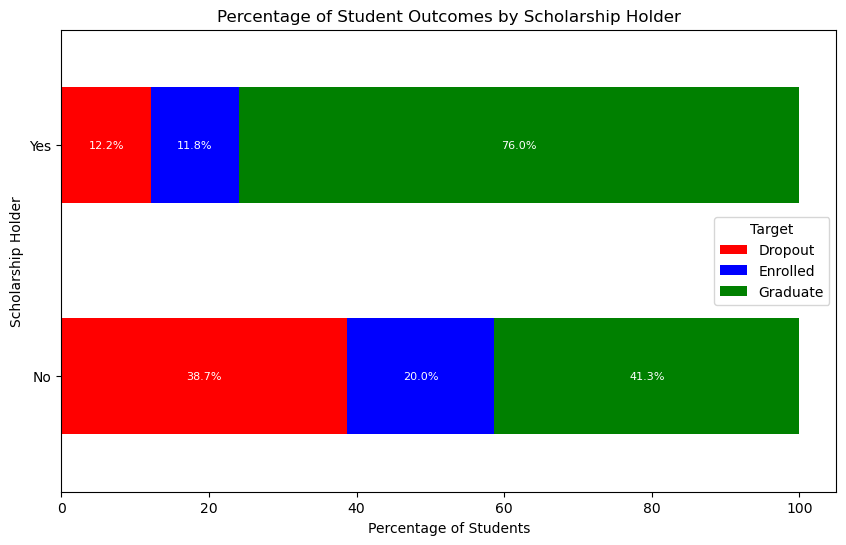

In [7]:
# Group by scholarship holder and count the number of graduates, enrolled, and dropouts
grouped_scholarship = df.groupby(['Scholarship holder', 'Target']).size().unstack(fill_value=0)

# Group by scholarship holder and calculate percentages
grouped_scholarship_percentage = grouped_scholarship.div(grouped_scholarship.sum(axis=1), axis=0) * 100
ax = grouped_scholarship_percentage.plot(kind='barh', stacked=True, figsize=(10, 6), color=['red', 'blue', 'green'])
plt.title('Percentage of Student Outcomes by Scholarship Holder')
plt.xlabel('Percentage of Students')
plt.ylabel('Scholarship Holder')
plt.legend(title='Target')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.1f%%', label_type='center', fontsize=8, color='white')
plt.show()

# Multi-collinearity

We can see that some pair of features have high correlation coefficient, which incrieases multi-collinearity, we can see that democrafic features are highly correlated with each other, and the academic features too.

/home/andre/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/andre/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


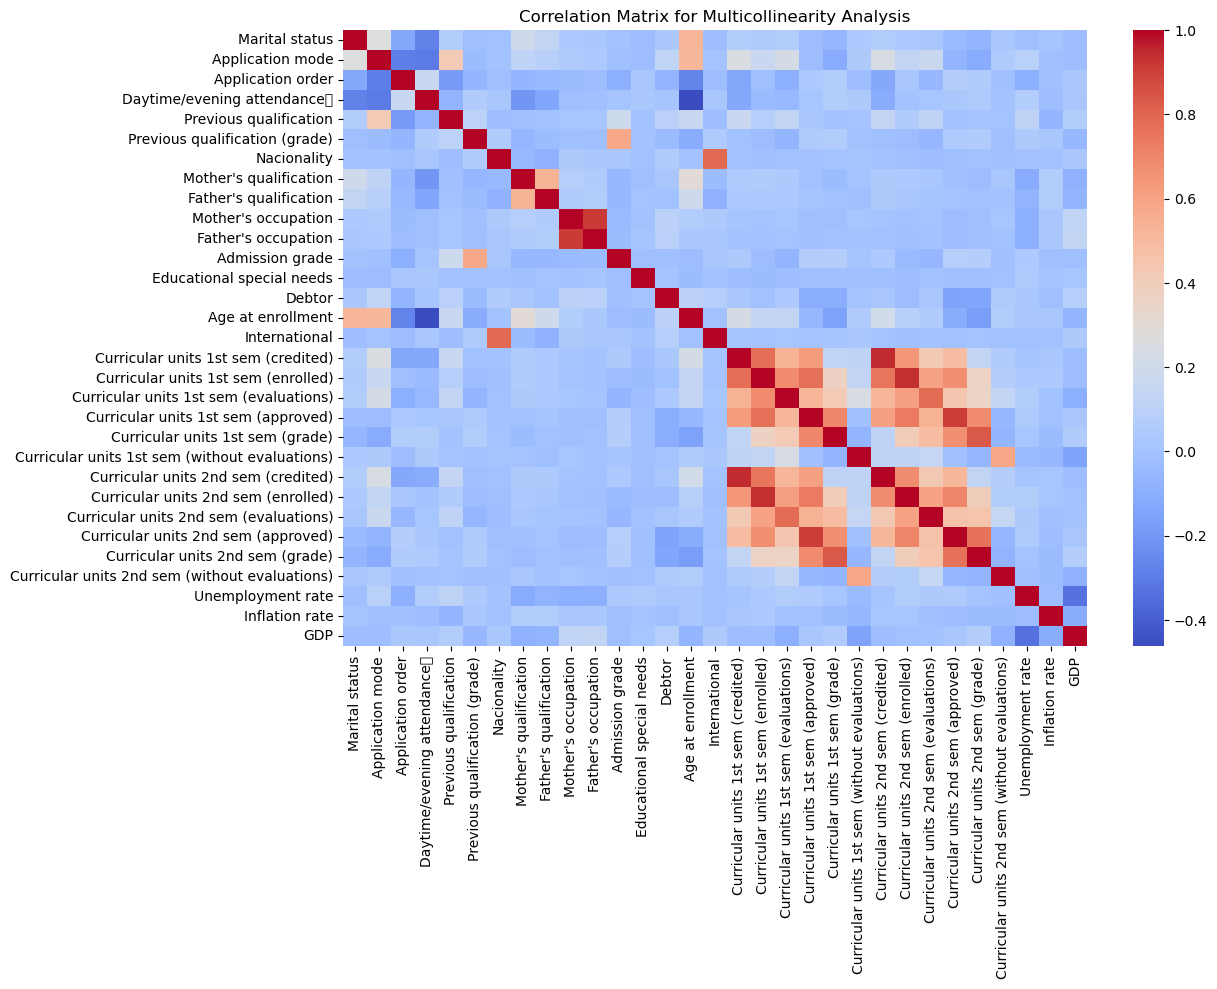

In [8]:
# Calculate and visualize multicollinearity without numbers in the heatmap
import seaborn as sns
# Filter numeric columns only
numeric_df = df.select_dtypes(include=['number'])
# Compute the correlation matrix
correlation_matrix = numeric_df.corr()
# Plot the heatmap without annotations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for Multicollinearity Analysis')
plt.show()

# Feature importance

/tmp/ipykernel_12047/1088771213.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
/home/andre/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


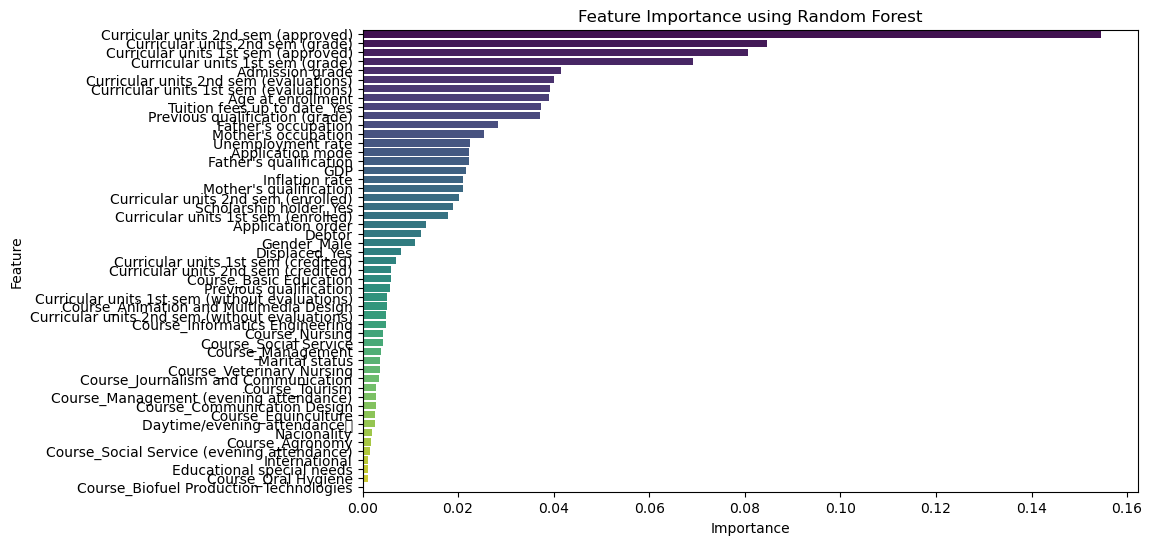

In [111]:
# Compute feature importance using Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
# Prepare the data
X = df.drop(columns=['Target'])
y = df['Target']
# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance using Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()